In [40]:
!pip install plotly_express

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
from sklearn import datasets
import random 
import pandas as pd
import seaborn as sns
import plotly_express as px
import numpy as np
# plt.style.use('default')
color_pallete = ['#fc5185', '#3fc1c9', '#364f6b']
sns.set_palette(color_pallete)
sns.set_style("white")

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


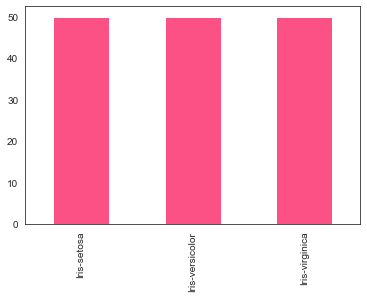

In [4]:
df['Species'].value_counts().plot(kind='bar')

In [5]:
df.drop(['Id'], inplace=True, axis=1)

<Figure size 576x576 with 0 Axes>

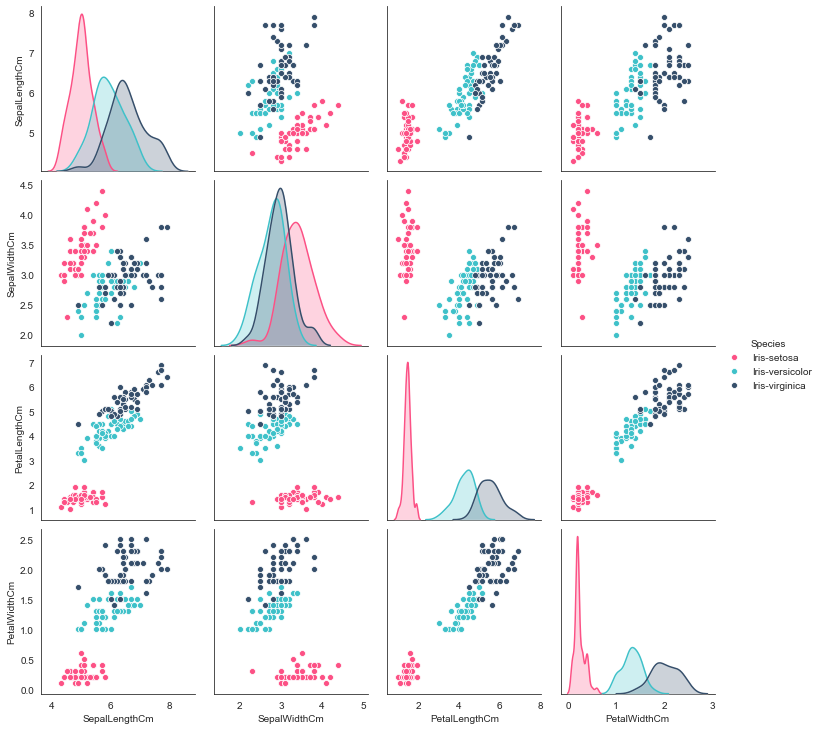

In [6]:
def pairplot_(df, hue):
    plt.figure(figsize=(8, 8))
    ax = sns.pairplot(df, hue)
    plt.show()
pairplot_(df,'Species')

In [9]:
def plot3D(df,X,Y,Z,color,size):
    return px.scatter_3d(df,x=X,y=Y,z=Z,size=size,color=color,
                        color_discrete_map={"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

plot3D(df,'SepalWidthCm','PetalWidthCm','SepalLengthCm',size='PetalLengthCm',color='Species')

In [8]:
###########################Tipo 1#############################
random.seed(42)
#Tipo 1.1 -> Utilizar Shaffle, y seleccionar los n primeros
def uniformShuffle(df):
    index = random.sample(list(df.index),len(df))
    return df.iloc[index].reset_index().drop(columns=['index'])

def sampler1_1 (n,df):
    index=random.sample(list(df.index),n)
    sample1=df.iloc[index,:]
    return sample1

def samplerPoisson(n,df):
    temp_df_idx=list(df.index)
    sampleT_idx=[]
    for i in range(n):
        state=True
        while state:
            idxPoisson=np.random.poisson(len(temp_df_idx)/2)
            if idxPoisson <= len(temp_df_idx)-1:
                state = False
        #print(idxPoisson)
        if len(temp_df_idx)==1:
            sampleT_idx.append(temp_df_idx[0])
        else:
            sampleT_idx.append(temp_df_idx[idxPoisson])
            temp_df_idx.remove(temp_df_idx[idxPoisson])

    return df.iloc[sampleT_idx]

def samplerBinomial(n,df):
    temp_df_idx=list(df.index)
    sampleT_idx=[]
    for i in range(n):
        state=True
        while state:
            idxPoisson=np.random.binomial(len(temp_df_idx),0.5)
            if idxPoisson <= len(temp_df_idx)-1:
                state = False
        if len(temp_df_idx)==1:
            sampleT_idx.append(temp_df_idx[0])
        else:
            sampleT_idx.append(temp_df_idx[idxPoisson])
            temp_df_idx.remove(temp_df_idx[idxPoisson])
    return df.iloc[sampleT_idx]



In [518]:
#Versión previa que no sirve pero esta cool
temp_df=df.copy()
sampleT=[]
n=10
for i in range(n):
    state=True
    while state:
        idxPoisson=np.random.poisson(len(temp_df)/2)
        if idxPoisson <= len(temp_df):
            state = False
    print(idxPoisson)
    sampleT.append(temp_df.iloc[idxPoisson])
    temp_df=temp_df.drop(df.index[idxPoisson],axis=0)
    temp_df.reset_index()

83
82
68
70
67
63
55
66
75
69


In [721]:
#Version que si sirve
n=90
poissonsampler_df=samplerPoisson(n,df)
plot3D(poissonsampler_df,'PetalLengthCm','PetalWidthCm','SepalLengthCm',size='SepalWidthCm',color='Species')

<Figure size 576x576 with 0 Axes>

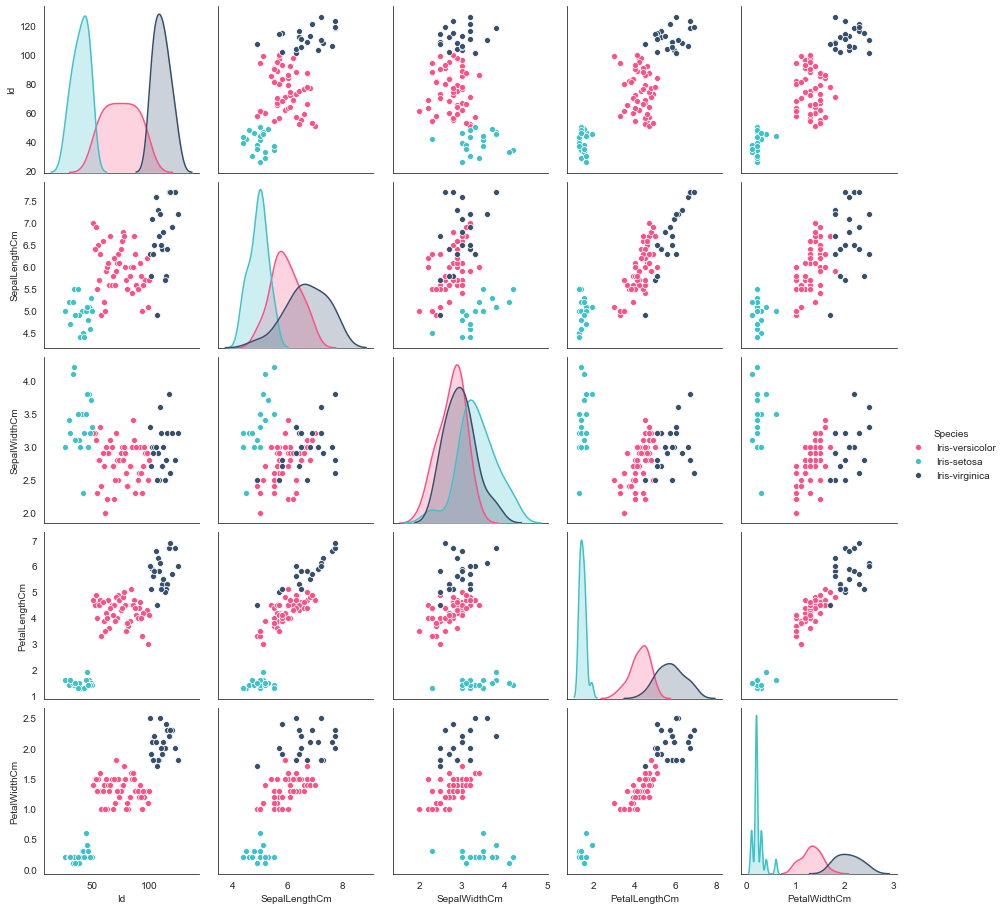

In [723]:
pairplot_(poissonsampler_df, hue='Species')

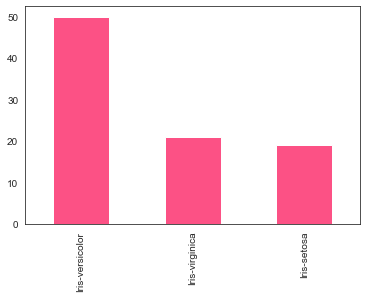

In [724]:
poissonsampler_df['Species'].value_counts().plot(kind='bar')

In [725]:
n=90
binomialsampler_df=samplerBinomial(n,df)
plot3D(binomialsampler_df,'PetalLengthCm','PetalWidthCm','SepalLengthCm',size='SepalWidthCm',color='Species')

<Figure size 576x576 with 0 Axes>

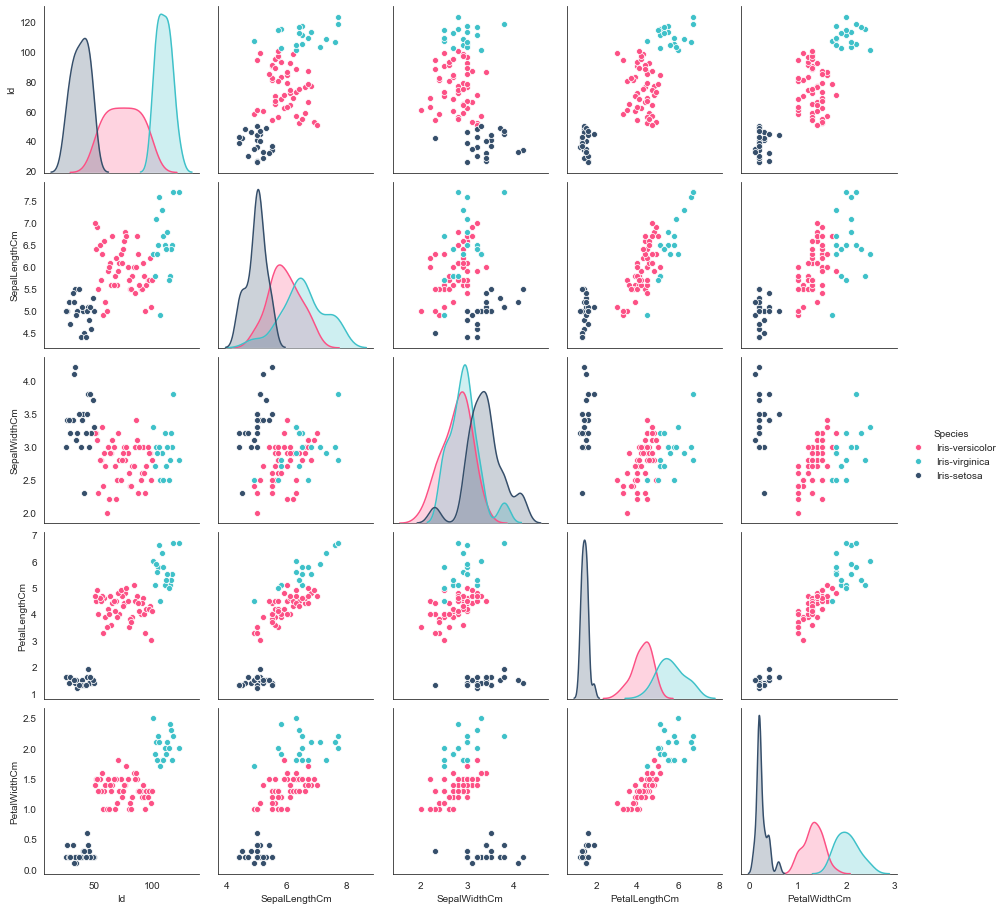

In [726]:
pairplot_(binomialsampler_df, hue='Species')

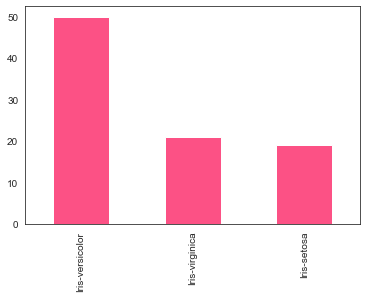

In [727]:
poissonsampler_df['Species'].value_counts().plot(kind='bar')

In [730]:
n=int(0.60*len(df))
uniformsampled_df_t1=sampler1_1(n,df)
plot3D(uniformsampled_df_t1,'PetalLengthCm','PetalWidthCm','SepalLengthCm',size='SepalWidthCm',color='Species')

<Figure size 576x576 with 0 Axes>

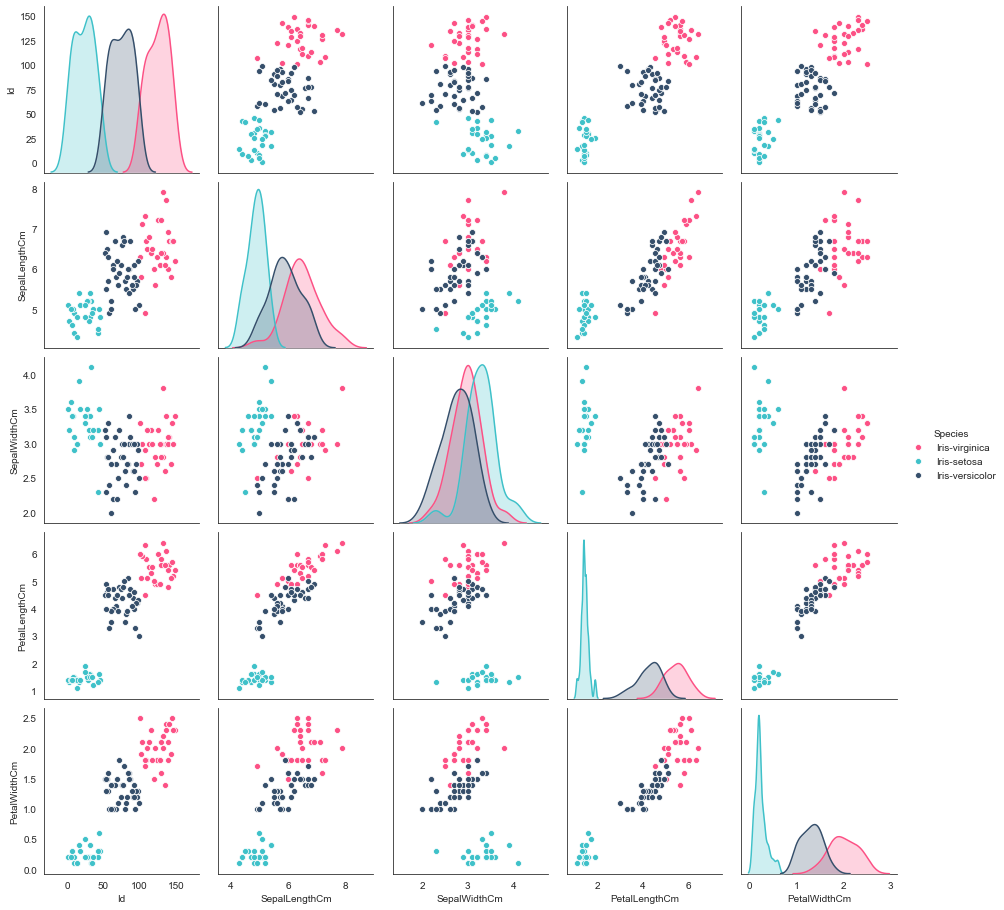

In [731]:
pairplot_(uniformsampled_df_t1, hue='Species')

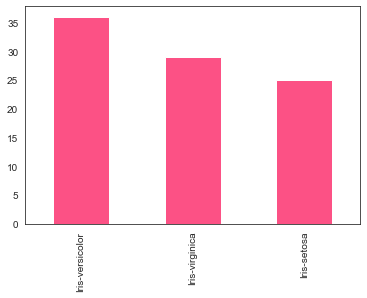

In [733]:
uniformsampled_df_t1['Species'].value_counts().plot(kind='bar')

In [734]:
#Y si mezclo, y luego selecciono uniforme?
uniformsampled_df_t2=sampler1_1(n,uniformShuffle(df))
plot3D(uniformsampled_df_t2,'PetalLengthCm','PetalWidthCm','SepalLengthCm',size='SepalWidthCm',color='Species')

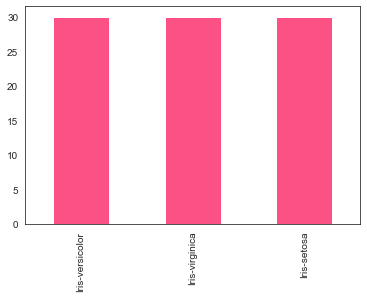

In [735]:
uniformsampled_df_t2['Species'].value_counts().plot(kind='bar')

In [736]:
#Y si mezclo, y luego selecciono poisson?
poissonsampler_df_shuffle=samplerPoisson(n,uniformShuffle(df))
plot3D(poissonsampler_df_shuffle,'PetalLengthCm','PetalWidthCm','SepalLengthCm',size='SepalWidthCm',color='Species')

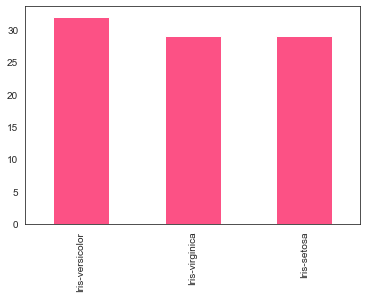

In [737]:
poissonsampler_df_shuffle['Species'].value_counts().plot(kind='bar')

In [738]:
#Y si mezclo, y luego selecciono binomial?
binomialsampler_df_shuffle=samplerBinomial(n,uniformShuffle(df))
plot3D(binomialsampler_df_shuffle,'PetalLengthCm','PetalWidthCm','SepalLengthCm',size='SepalWidthCm',color='Species')

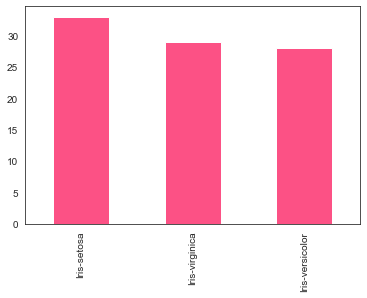

In [739]:
binomialsampler_df_shuffle['Species'].value_counts().plot(kind='bar')